Found 9112 images belonging to 14 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


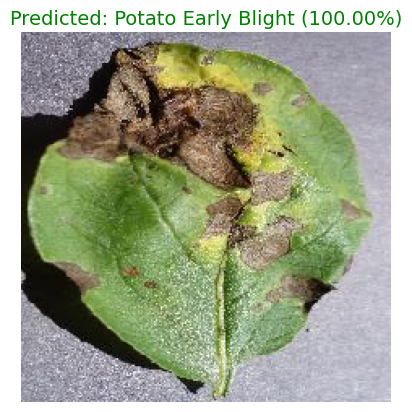

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size (same as used in training)
input_shape = (228, 228)

# Load trained model
model_path = "inceptionV3.h5"  # Ensure this file exists
model = load_model(model_path)

# Function to preprocess a single leaf image
def preprocess_single_leaf(image_path):
    """Loads and preprocesses a single leaf image for classification."""
    img = load_img(image_path, target_size=input_shape)  # Resize to match model input
    img_array = img_to_array(img)  # Convert to array
    img_array = img_array / 255.0  # Normalize like training data
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Define actual class labels in the correct order (from dataset)
true_class_labels = [
    'Corn Common Rust', 'Corn Gray Leaf Spot', 'Corn Healthy', 'Corn Northern Leaf Blight',
    'Potato Early Blight', 'Potato Healthy', 'Potato Late Blight',
    'Rice Brown Spot', 'Rice Healthy', 'Rice Leaf Blast', 'Rice Neck Blast',
    'Wheat Brown Rust', 'Wheat Healthy', 'Wheat Yellow Rust'
]

# Fetch class labels dynamically to avoid mismatches
train_dir = "C:\\Dataset\\Train\\"  # Replace with actual dataset path
datagen_train = ImageDataGenerator(rescale=1./255, dtype=np.float32)
generator_train = datagen_train.flow_from_directory(directory=train_dir, 
                                                    target_size=input_shape, 
                                                    batch_size=1, 
                                                    shuffle=False)

# Get assigned class indices from flow_from_directory()
class_indices = generator_train.class_indices  # {'0': 0, '1': 1, ..., '13': 13}

# Correct mapping: index assigned by flow_from_directory() → actual class name
index_to_class = {v: true_class_labels[int(k)] for k, v in class_indices.items()}

# Function to classify a single leaf image
def classify_leaf(image_path):
    """Classifies a single leaf image and returns the predicted class."""
    preprocessed_image = preprocess_single_leaf(image_path)
    prediction = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(prediction)  # Get highest probability class
    predicted_class = index_to_class[predicted_class_index]  # Convert to class name
    confidence = np.max(prediction)  # Get confidence score
    return predicted_class, confidence

# Function to visualize the prediction
def display_prediction(image_path):
    """Displays the leaf image along with the predicted class label."""
    predicted_class, confidence = classify_leaf(image_path)
    img = load_img(image_path, target_size=input_shape)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class} ({confidence*100:.2f}%)", fontsize=14, color="green")
    plt.show()

# Example usage
if __name__ == "__main__":
    image_path = r"C:\Dataset\Test\4\0e0a1b51-f61c-4934-bc57-a820af1faacb___RS_Early.B 7147.jpg"  # Replace with actual image path
    display_prediction(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step


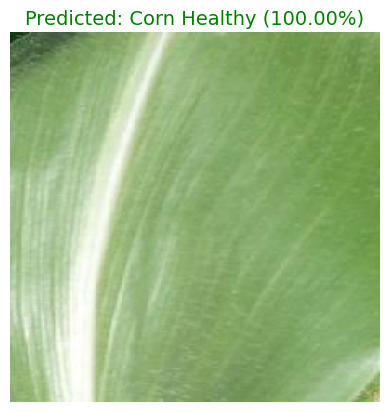

In [17]:
image_path = r"C:\Dataset\Test\2\image (4).jpg"  # Change this to your test image
display_prediction(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


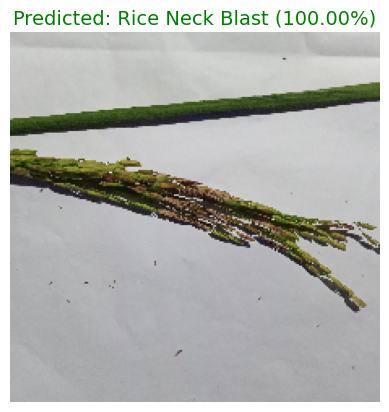

In [18]:
image_path = r"C:\Dataset\Test\10\IMG20201109211715_00.jpg"  # Change this to your test image
display_prediction(image_path)